# Sleep Health and Lifestyle Predication

# Problem:
Getting good sleep is a big part of being healthy. We should spend about one-third of our lives sleeping, but a lot of people don't get enough, some people have trouble sleeping, and that's the most common sleep problem

# Colab:
521H0504 - Bùi Hữu Lộc
521H0329 - Nguyễn Phạm Thanh Uyên

# Solve:
With AI, we can use machine learning models to learn from a set of training data and then test them on another set of data. **These models can predict if someone has a sleep disorder or not by analyzing the input data**

# Data features:
<table>
<tr>
<td>Person ID</td>
<td>An identifier for each individual.</td>
</td>
<tr>
<td>Gender</td>
<td>The gender of the person (Male/Female).</td>
</td>
<tr>
<td>Age</td>
<td>The age of the person in years.</td>
</td>
<tr>
<td>Occupation</td>
<td>The occupation or profession of the person.</td>
</td>
<tr>
<td>Sleep Duration (hours)</td>
<td>The number of hours the person sleeps per day.</td>
</td>
<tr>
<td>Quality of Sleep (scale: 1-10)</td>
<td>A subjective rating of the quality of sleep, ranging from 1 to 10.</td>
</td>
<tr>
<td>Physical Activity Level (minutes/day)</td>
<td>The number of minutes the person engages in physical activity daily.</td>
</td>
<tr>
<td>Stress Level (scale1-10)</td>
<td>A subjective rating of the stress level experienced by the person, ranging from 1 to 10.</td>
</td>
<tr>
<td>BMI Category</td>
<td>The BMI category of the person (e.g., Underweight, Normal, Overweight).</td>
</td>
<tr>
<td>Blood Pressure (systolic/diastolic)</td>
<td>The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.</td>
</td>
<tr>
<td>Heart Rate (bpm)</td>
<td>The resting heart rate of the person in beats per minute.</td>
</td>
<tr>
<td>Daily Steps</td>
<td>The number of steps the person takes per day.</td>
</td>
<tr>
<td>Sleep Disorder</td>
<td>The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).</td>
</td>
</table>

## 1 - Statistical analysis on data, drawing graphs to understand the problem, understand the data. Learn the characteristics and evaluate the role of the characteristics for the problem goal

In [324]:
# @title 1.1 - Import lib & read data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/maoleng/final-machine-learning/main/dataset.csv')
df.head().style.set_properties(**{'background-color': '#4A235A', 'color': '#E2EEF3'})

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [325]:
# @title 1.2 - Observes

# check null & check data type
df.info()

# Five columns have string data type, while the remaining columns are numeric
# No null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [326]:
# @title 1.3 - Basic statistic

df.describe().style.background_gradient(cmap='BuPu')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [327]:
# @title 1.4 - Basic statistic for string features

df.describe(include='O').style.set_properties(**{'background-color': '#4A235A', 'color': '#E2EEF3'})

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


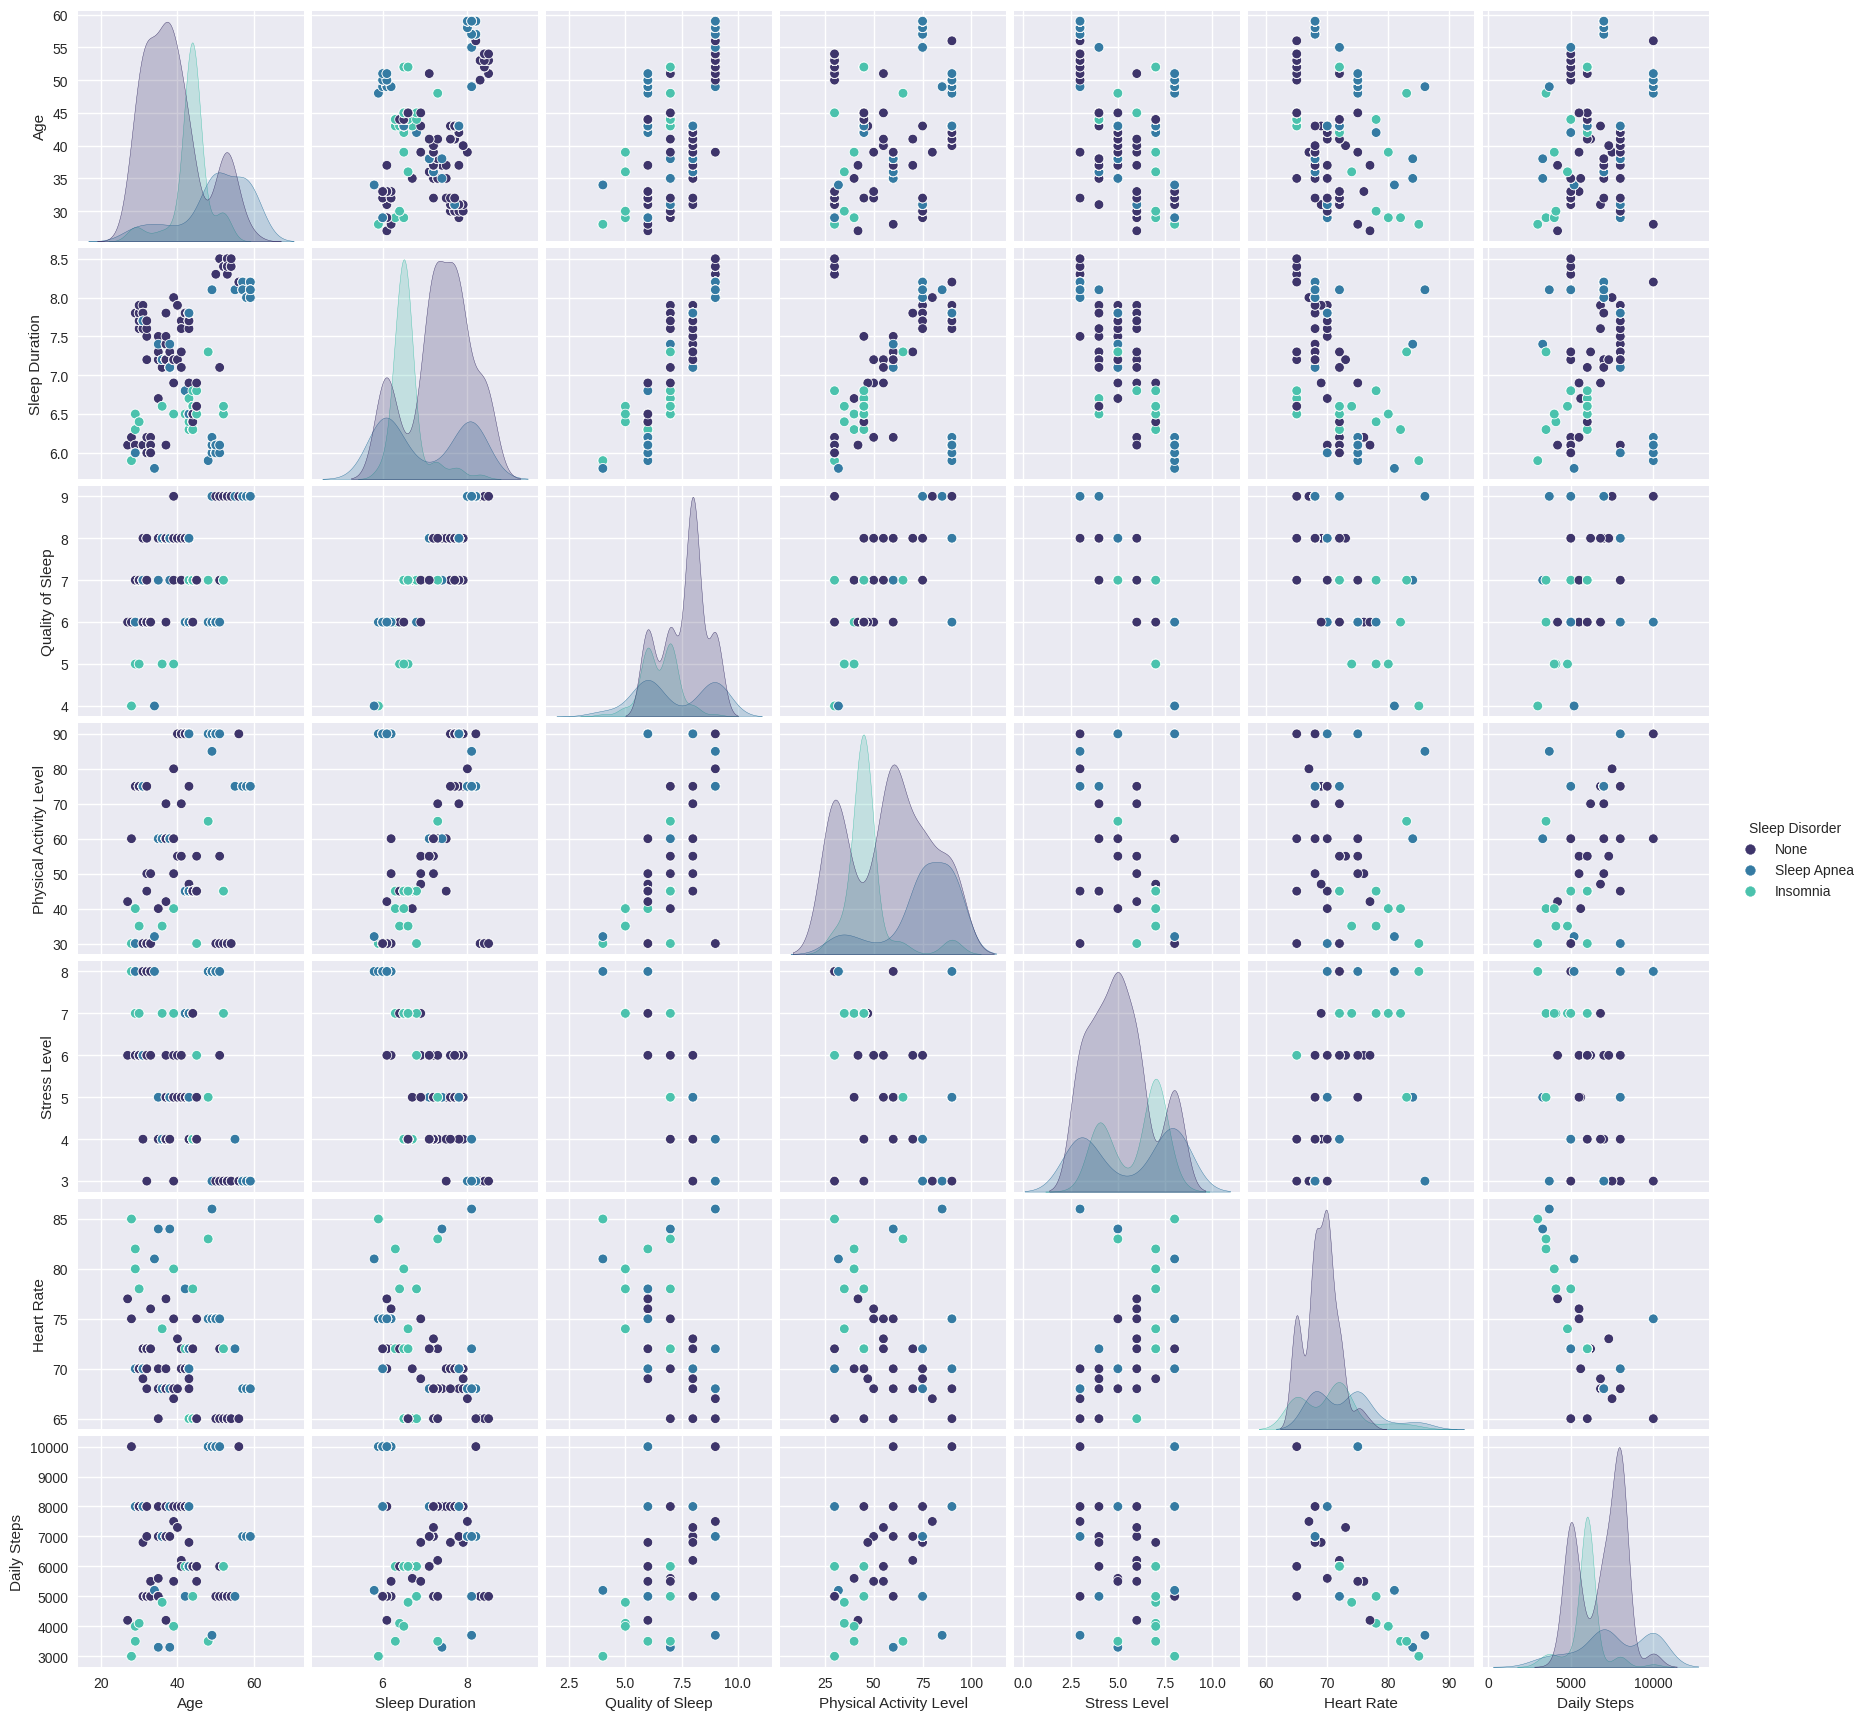

In [328]:
# @title 1.5 - Data Analysis

plt.style.use('seaborn-v0_8')
sns.pairplot(data=df.drop('Person ID',axis=1),hue='Sleep Disorder',palette='mako')
plt.legend()
plt.show()

# visualize relationships between pairs of variables in df

In [329]:
# @title 1.6 - Draw histograms for sleep disorder prevalence

fig=px.histogram(df,x='Sleep Disorder',
                 barmode="group",
                 color='Sleep Disorder',
                 color_discrete_sequence=['red','yellow','blue'],
                 text_auto=True)
fig.update_layout(title='Sleep disorder prevalence',showlegend=True)
fig.update_yaxes(showgrid=False)
fig.show()


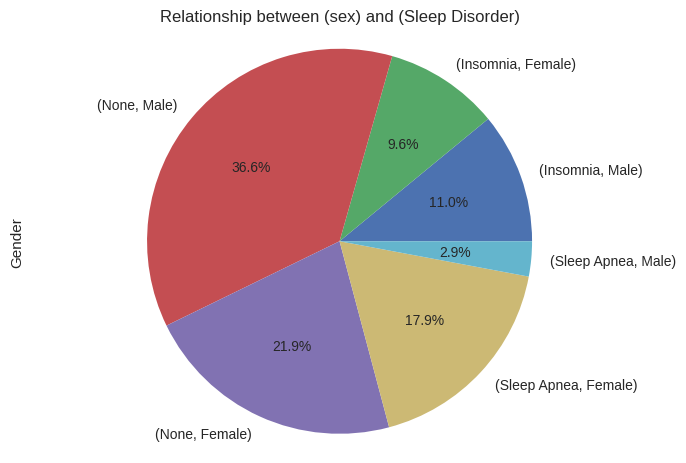

In [330]:
# @title 1.7 - Draw pie chart for sleep disorder and gender

df.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%')
plt.title('Relationship between (sex) and (Sleep Disorder)')
plt.axis('equal')

plt.show()

In [331]:
# @title 1.8 - Draw treemap for impact of employment on one's sleep

fig=px.treemap(df,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'])
fig.update_layout(title='The impact of employment on one\'s sleep')
fig.show()

In [332]:
# @title 1.9 - Draw sunburst chart for effect sleep quality to sleep Disorder

fig=px.sunburst(df,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
                color='Sleep Disorder',
                values='Sleep Duration',
                color_discrete_sequence=['pink','#4A235A','#FFF3FD'],
                hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>')
fig.show()

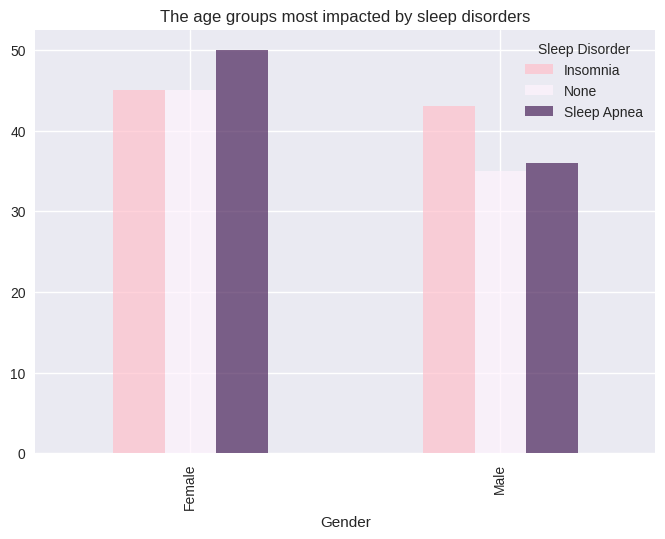

In [333]:
# @title 1.10 - Draw bar chart for the age groups most impacted by sleep disorders

df.pivot_table(index='Gender',
               columns='Sleep Disorder',
               values='Age',
               aggfunc='median').plot(
                      kind='bar',
                      color={'#FFF3FD','#4A235A','pink'},
                      title='The age groups most impacted by sleep disorders',
                      label='Age',alpha=.7)

plt.show()

In [334]:
# @title 1.11 - Draw bar chart for effect sleep duration to sleep disorder

fig=px.histogram(df,x='Sleep Disorder',y='Sleep Duration',color='Sleep Disorder', text_auto=True)
fig.update_layout(title='The effect of Sleep Duration on Sleep Disorder',
                  showlegend=True,
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')
fig.update_yaxes(showgrid=False)
fig.show()

In [335]:
# @title 1.12 - Draw scatter 3d for the impact of BMI category, blood pressure, and heart rate on sleep disorders


fig=px.scatter_3d(df,x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=1000,height=900)
fig.update_layout(title='The impact of BMI category, blood pressure, and heart rate on sleep disorders',
                  showlegend=True)
fig.show()

In [336]:
# @title 1.13 - Draw bar chart for the effect of Stress Level on Sleep Disorder

fig=px.histogram(df,x='Sleep Disorder', color='Sleep Disorder', facet_col='Stress Level',
                 barmode='group', color_discrete_sequence=['white','#4A235A','#C39BD3'], opacity=.8)
fig.update_layout(title='The effect of Stress Level on Sleep Disorder',
                  paper_bgcolor='#EBDEF0',plot_bgcolor='#EBDEF0')
fig.show()

## 2 - Apply basic machine learning models to solve problems, including Ensemble Learning models

In [337]:
# @title 2.1 Data preprocessing
df.isna().sum()

# there is no null value

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [338]:
df['Blood Pressure']=df['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
# 0 = normal blood pressure
# 1 = abnormal blood pressure

df["Age"]=pd.cut(df["Age"],2)
df["Heart Rate"]=pd.cut(df["Heart Rate"],4)
df["Daily Steps"]=pd.cut(df["Daily Steps"],4)
df["Sleep Duration"]=pd.cut(df["Sleep Duration"],3)
df["Physical Activity Level"]=pd.cut(df["Physical Activity Level"],4)

In [339]:
# convert non-numeric data (String or Boolean) into numbers
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    df[label]=LE.fit_transform(df[label])

In [340]:
df.drop(['Person ID'], axis=1, inplace=True)

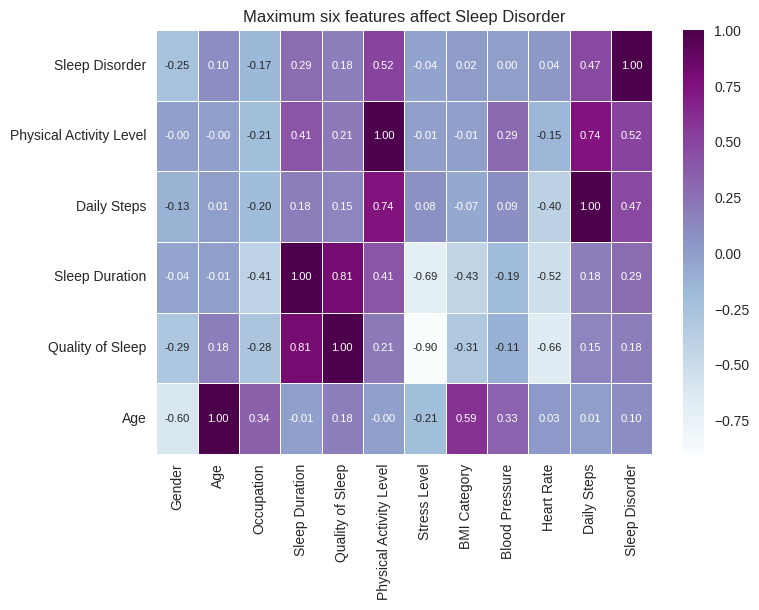

In [341]:
# Top six features that most strongly correlate with the "Sleep Disorder" variable in the "sleep_data" dataset

correlation =df.corr()
max_6_corr=correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Maximum six features affect Sleep Disorder')
plt.show()

In [342]:
# split data for training and testing

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=32,shuffle=True)

In [343]:
# @title 2.2 LogisticRegression Model
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=1000).fit(x_train,y_train)

LR_training_score=round(LR.score(x_train,y_train)*100,2)
LR_testing_score=round(LR.score(x_test,y_test)*100,2)

print(f"LR training score :",LR_training_score)
print("LR testing score :",LR_testing_score)

LR_y_pred=LR.predict(x_test)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
print(f'LogisticRegression Accuracy: {LR_accuracy:.3f}')

LR training score : 90.8
LR testing score : 91.94
LogisticRegression Accuracy: 0.919


In [344]:
# @title 2.3 Random Forest Model

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier().fit(x_train,y_train)

RF_training_score=round(RF.score(x_train,y_train)*100,2)
RF_testing_score=round(RF.score(x_test,y_test)*100,2)

print(f"RF training score :",RF_training_score)
print("RF testing score :",RF_testing_score)

RF_y_pred=RF.predict(x_test)
RF_accuracy = accuracy_score(y_test, RF_y_pred)
print(f'Random Forest Accuracy: {RF_accuracy:.3f}')

RF training score : 93.2
RF testing score : 91.13
Random Forest Accuracy: 0.911


In [345]:
# @title 2.4 Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier().fit(x_train,y_train)

DTC_training_score=round(DTC.score(x_train,y_train)*100,2)
DTC_testing_score=round(DTC.score(x_test,y_test)*100,2)

print(f"DTC training score :",DTC_training_score)
print("DTC testing score :",DTC_testing_score)

DTC_y_pred=DTC.predict(x_test)
DTC_accuracy = accuracy_score(y_test, DTC_y_pred)
print(f'Decision Tree Accuracy: {DTC_accuracy:.3f}')

DTC training score : 93.2
DTC testing score : 90.32
Decision Tree Accuracy: 0.903


In [346]:
# @title 2.5 K Neighbor Model

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier().fit(x_train,y_train)

KN_training_score=round(KN.score(x_train,y_train)*100,2)
KN_testing_score=round(KN.score(x_test,y_test)*100,2)

print(f"KN training score :",KN_training_score)
print("KN testing score :",KN_testing_score)

KN_y_pred=KN.predict(x_test)
KN_accuracy = accuracy_score(y_test, KN_y_pred)
print(f'K Neighbor Accuracy: {KN_accuracy:.3f}')

KN training score : 89.6
KN testing score : 88.71
K Neighbor Accuracy: 0.887


In [347]:
# @title 2.6 XGBClassifier Model
from xgboost import XGBClassifier
xgb=XGBClassifier().fit(x_train,y_train)
xgb_training_score=round(xgb.score(x_train,y_train)*100,2)
xgb_testing_score=round(xgb.score(x_test,y_test)*100,2)

print("xgb training score :",xgb_training_score)
print("xgb testing score :",xgb_testing_score)

xgb_y_pred=xgb.predict(x_test)
XGB_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f'XGBClassifier Accuracy: {XGB_accuracy:.3f}')

xgb training score : 93.2
xgb testing score : 91.13
XGBClassifier Accuracy: 0.911


In [348]:
# @title 2.7 CatBoostClassifier Model

!pip3 install catboost
from catboost import CatBoostClassifier
CBC=CatBoostClassifier(verbose=False).fit(x_train,y_train)
CBC_training_score= round(CBC.score(x_train,y_train)*100,2)
CBC_testing_score=round(CBC.score(x_test,y_test)*100,2)

print("CBC training score :",CBC_training_score)
print("CBC testing score :",CBC_testing_score)

CBC_y_pred=CBC.predict(x_test)
CBC_accuracy = accuracy_score(y_test, CBC_y_pred)
print(f'CatBoostClassifier Accuracy: {CBC_accuracy:.3f}')

CBC training score : 93.2
CBC testing score : 91.13
CatBoostClassifier Accuracy: 0.911


In [349]:
# @title 2.8 GradientBoostingClassifier Model

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(x_train,y_train)
GBC_training_score=round(GBC.score(x_train,y_train)*100,2)
GBC_testing_score=round(GBC.score(x_test,y_test)*100,2)

print("GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)

GBC_y_pred=GBC.predict(x_test)
GBC_accuracy = accuracy_score(y_test, GBC_y_pred)
print(f'GradientBoostingClassifier Accuracy: {GBC_accuracy:.3f}')

GBC training score : 93.2
GBC testing score : 91.13
GradientBoostingClassifier Accuracy: 0.911


In [350]:
# @title 2.9 SVC Model

from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)
svc_training_score=round(svc.score(x_train,y_train)*100,2)
svc_testing_score=round(svc.score(x_test,y_test)*100,2)

print("svc training score :",svc_training_score)
print("svc testing score :",svc_testing_score)

svc_y_pred=svc.predict(x_test)
SVC_accuracy = accuracy_score(y_test, svc_y_pred)
print(f'SVC Accuracy: {SVC_accuracy:.3f}')

svc training score : 88.8
svc testing score : 87.9
SVC Accuracy: 0.879


## 3 - Use Feed Forward Neural Network and Recurent Neural Network (or models of this type) to solve the problem

In [351]:
# @title 3.1 Feed Forward Neural Network

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

ffnn = Sequential()
ffnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ffnn.add(Dense(32, activation='relu'))
ffnn.add(Dense(1, activation='sigmoid'))

ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

ffnn_y_pred = ffnn.predict(X_test)
ffnn_y_pred = (ffnn_y_pred > 0.5).astype(int)

ffnn_accuracy = accuracy_score(y_test, ffnn_y_pred)
print(f'Accuracy: {ffnn_accuracy * 100:.2f}%')

Epoch 1/10
7/7 [==============================] - 3s 34ms/step - loss: 0.5038 - accuracy: 0.5700 - val_loss: 0.3940 - val_accuracy: 0.7200
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3139 - accuracy: 0.5450 - val_loss: 0.2674 - val_accuracy: 0.7200
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.1575 - accuracy: 0.5400 - val_loss: 0.1475 - val_accuracy: 0.7200
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.5550 - val_loss: 0.0386 - val_accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 0s 14ms/step - loss: -0.1270 - accuracy: 0.5800 - val_loss: -0.0680 - val_accuracy: 0.7600
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: -0.2724 - accuracy: 0.5800 - val_loss: -0.1629 - val_accuracy: 0.7600
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: -0.4194 - accuracy: 0.6500 - val_loss: -0.2650 - val_accuracy: 0.8200
Epoch 8/10
7/7 [======

In [352]:
# @title 3.2 Reccurent Neural Network

from tensorflow.keras.layers import LSTM

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn = Sequential()
rnn.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
rnn.add(Dense(32, activation='relu'))
rnn.add(Dense(1, activation='sigmoid'))

rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

rnn_y_pred = rnn.predict(X_test)
rnn_y_pred = (rnn_y_pred > 0.5).astype(int)

rnn_accuracy = accuracy_score(y_test, rnn_y_pred)
print(f'Accuracy: {rnn_accuracy * 100:.2f}%')

Epoch 1/10
7/7 [==============================] - 2s 57ms/step - loss: 0.6921 - accuracy: 0.3050 - val_loss: 0.6621 - val_accuracy: 0.5400
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6450 - accuracy: 0.5650 - val_loss: 0.6226 - val_accuracy: 0.7200
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6020 - accuracy: 0.5400 - val_loss: 0.5805 - val_accuracy: 0.7200
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5562 - accuracy: 0.5400 - val_loss: 0.5367 - val_accuracy: 0.7200
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.4995 - accuracy: 0.5400 - val_loss: 0.4855 - val_accuracy: 0.7200
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4367 - accuracy: 0.5400 - val_loss: 0.4240 - val_accuracy: 0.7200
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3639 - accuracy: 0.5400 - val_loss: 0.3506 - val_accuracy: 0.7200
Epoch 8/10
7/7 [=============

## 4 - Apply techniques to avoid Overfitting on the models of sentences (2) and sentences (3) to solve the problem;

In [353]:
# @title 4.1 Use Regularization on LogisticRegression Model

LR_feature_selected = LogisticRegression(max_iter=1000, C=0.4).fit(x_train, y_train)
LR_reg_train_score = round(LR_feature_selected.score(x_train, y_train) * 100, 2)
LR_reg_test_score = round(LR_feature_selected.score(x_test, y_test) * 100, 2)

print("Before:")
print("LR training score :",LR_training_score)
print("LR testing score :",LR_testing_score)

print("After:")
print("LR Training Score:", LR_reg_train_score)
print("LR Testing Score:", LR_reg_test_score)

Before:
LR training score : 90.8
LR testing score : 91.94
After:
LR Training Score: 90.8
LR Testing Score: 91.94


In [354]:
# @title 4.2 Adjusting hyperparameters on Random Forest Model

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
RF_optimized = RandomForestClassifier(**best_params).fit(x_train, y_train)

RF_optimized_training_score = round(RF_optimized.score(x_train, y_train) * 100, 2)
RF_optimized_testing_score = round(RF_optimized.score(x_test, y_test) * 100, 2)

print("Before:")
print("RF training score :",RF_training_score)
print("RF testing score :",RF_testing_score)

print("After:")
print("RF Training Score:", RF_optimized_training_score)
print("RF Testing Score:", RF_optimized_testing_score)

Before:
RF training score : 93.2
RF testing score : 91.13
After:
RF Training Score: 93.2
RF Testing Score: 91.13


In [355]:
# @title 4.3 Pruning on Decision Tree Model

DTC_pruned = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

DTC_optimized_training_score = round(DTC_pruned.score(x_train, y_train) * 100, 2)
DTC_optimized_testing_score = round(DTC_pruned.score(x_test, y_test) * 100, 2)

print("Before:")
print("DTC training score :",DTC_training_score)
print("DTC testing score :",DTC_testing_score)

print("After:")
print("Training Score:", DTC_optimized_training_score)
print("Testing Score:", DTC_optimized_testing_score)

Before:
DTC training score : 93.2
DTC testing score : 90.32
After:
Training Score: 90.4
Testing Score: 88.71


In [356]:
# @title 4.4 Feature Scaling on K Neighbor Model

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
KN_optimized = KNeighborsClassifier().fit(x_train_scaled, y_train)

KN_optimized_training_score = round(KN.score(x_train_scaled, y_train) * 100, 2)
KN_optimized_testing_score = round(KN.score(x_test_scaled, y_test) * 100, 2)

print("Before:")
print("KN training score:", KN_training_score)
print("KN testing score:", KN_testing_score)
print("After:")
print("KN training score:", KN_optimized_training_score)
print("KN testing score:", KN_optimized_testing_score)

Before:
KN training score: 89.6
KN testing score: 88.71
After:
KN training score: 65.2
KN testing score: 65.32


In [357]:
# @title 4.5 Adjust Hyperparameters on XGBClassifier Model

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
xgb_tuned = XGBClassifier(**best_params).fit(x_train, y_train)
xgb_training_score_t=round(xgb_tuned.score(x_train,y_train)*100,2)
xgb_testing_score_t=round(xgb_tuned.score(x_test,y_test)*100,2)


print("Before:")
print("XGB training score :",xgb_training_score)
print("XGB testing score :",xgb_testing_score)
print("After:")
print("XGB training score :",xgb_training_score_t)
print("XGB testing score :",xgb_testing_score_t)

Before:
XGB training score : 93.2
XGB testing score : 91.13
After:
XGB training score : 93.2
XGB testing score : 91.13


In [358]:
# @title 4.6 Adjust Regularization on CatBoostClassifier Model

CBC_reg = CatBoostClassifier(verbose=False, l2_leaf_reg=5).fit(x_train, y_train)
CBC_reg_training_score = round(CBC_reg.score(x_train, y_train) * 100, 2)
CBC_reg_testing_score = round(CBC_reg.score(x_test, y_test) * 100, 2)

print("Before:")
print("CBC training score :",CBC_training_score)
print("CBC testing score :",CBC_testing_score)
print("After:")
print("CBC training score:", CBC_reg_training_score)
print("CBC testing score:", CBC_reg_testing_score)

Before:
CBC training score : 93.2
CBC testing score : 91.13
After:
CBC training score: 93.2
CBC testing score: 91.13


In [359]:
# @title 4.7 Adjust learning rate on GradientBoostingClassifier Model

GBC_lr = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500).fit(x_train, y_train)
GBC_lr_training_score = round(GBC_lr.score(x_train, y_train) * 100, 2)
GBC_lr_testing_score = round(GBC_lr.score(x_test, y_test) * 100, 2)

print("Before:")
print("GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)
print("After:")
print("GBC training score:", GBC_lr_training_score)
print("GBC testing score:", GBC_lr_testing_score)

Before:
GBC training score : 93.2
GBC testing score : 91.13
After:
GBC training score: 93.2
GBC testing score: 91.13


In [360]:
# @title 4.8 Adjust Regularization on SVC Model

svc_reg = SVC(C=0.1).fit(x_train, y_train)
svc_reg_training_score = round(svc_reg.score(x_train, y_train) * 100, 2)
svc_reg_testing_score = round(svc_reg.score(x_test, y_test) * 100, 2)

print("Before:")
print("SVC training score :",svc_training_score)
print("SVC testing score :",svc_testing_score)
print("After:")
print("SVC training score:", svc_reg_training_score)
print("SVC testing score:", svc_reg_testing_score)

Before:
SVC training score : 88.8
SVC testing score : 87.9
After:
SVC training score: 70.0
SVC testing score: 68.55


In [361]:
# @title 4.9 Add regularization terms to the Dense layers on Feed Forward Neural Network

from tensorflow.keras import regularizers

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

ffnn_reg = Sequential()
ffnn_reg.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
ffnn_reg.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
ffnn_reg.add(Dense(1, activation='sigmoid'))

ffnn_reg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ffnn_reg.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

ffnn_reg_y_pred = ffnn_reg.predict(X_test)
ffnn_reg_y_pred = (ffnn_reg_y_pred > 0.5).astype(int)

ffnn_reg_accuracy = accuracy_score(y_test, ffnn_reg_y_pred)
print("Before ffnn accuracy score: ", ffnn_accuracy)
print("After ffnn accuracy score: ", ffnn_reg_accuracy)

Epoch 1/10
7/7 [==============================] - 1s 37ms/step - loss: 1.2175 - accuracy: 0.4700 - val_loss: 1.1219 - val_accuracy: 0.5400
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 1.0261 - accuracy: 0.5350 - val_loss: 0.9750 - val_accuracy: 0.7200
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.8607 - accuracy: 0.5450 - val_loss: 0.8446 - val_accuracy: 0.7200
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.7111 - accuracy: 0.5400 - val_loss: 0.7206 - val_accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 0.5623 - accuracy: 0.5800 - val_loss: 0.6069 - val_accuracy: 0.7600
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: 0.4066 - accuracy: 0.5850 - val_loss: 0.5045 - val_accuracy: 0.7600
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2697 - accuracy: 0.5850 - val_loss: 0.3979 - val_accuracy: 0.7600
Epoch 8/10
7/7 [==============

In [362]:
# @title 4.10 Apply L1 or L2 regularization to the LSTM layer on Reccurent Neural Network

from tensorflow.keras.regularizers import l2

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn_reg = Sequential()
rnn_reg.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', kernel_regularizer=l2(0.01)))
rnn_reg.add(Dense(32, activation='relu'))
rnn_reg.add(Dense(1, activation='sigmoid'))

rnn_reg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn_reg.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

rnn_reg_y_pred = rnn_reg.predict(X_test)
rnn_reg_y_pred = (rnn_reg_y_pred > 0.5).astype(int)

rnn_reg_accuracy = accuracy_score(y_test, rnn_reg_y_pred)
print(f'Before rnn accuracy score: {rnn_accuracy * 100:.2f}%')
print(f'After rnn accuracy score: {rnn_reg_accuracy * 100:.2f}%')

Epoch 1/10
7/7 [==============================] - 3s 87ms/step - loss: 0.9173 - accuracy: 0.4500 - val_loss: 0.8727 - val_accuracy: 0.5600
Epoch 2/10
7/7 [==============================] - 0s 14ms/step - loss: 0.8425 - accuracy: 0.7000 - val_loss: 0.8086 - val_accuracy: 0.8000
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 0.7821 - accuracy: 0.6200 - val_loss: 0.7504 - val_accuracy: 0.7600
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 0.7258 - accuracy: 0.6150 - val_loss: 0.6947 - val_accuracy: 0.7800
Epoch 5/10
7/7 [==============================] - 0s 15ms/step - loss: 0.6688 - accuracy: 0.5950 - val_loss: 0.6383 - val_accuracy: 0.7800
Epoch 6/10
7/7 [==============================] - 0s 15ms/step - loss: 0.6078 - accuracy: 0.5700 - val_loss: 0.5806 - val_accuracy: 0.7200
Epoch 7/10
7/7 [==============================] - 0s 12ms/step - loss: 0.5421 - accuracy: 0.5400 - val_loss: 0.5178 - val_accuracy: 0.7200
Epoch 8/10
7/7 [===========

## 5 - After training the model, we want to improve the accuracy, what should we do to solve it? Analyze the wrong cases, propose a solution and implement it, then evaluate whether there is improvement compared to before

Actual label: 1, Predicted label: 2
Actual label: 2, Predicted label: 0
Actual label: 2, Predicted label: 1
Actual label: 0, Predicted label: 1
Actual label: 2, Predicted label: 1
Actual label: 0, Predicted label: 1
Actual label: 1, Predicted label: 2
Actual label: 2, Predicted label: 0
Actual label: 2, Predicted label: 1
Actual label: 0, Predicted label: 1
Actual label: 2, Predicted label: 0
Actual label: 2, Predicted label: 0
Actual label: 2, Predicted label: 0
Actual label: 2, Predicted label: 1
Actual label: 1, Predicted label: 0


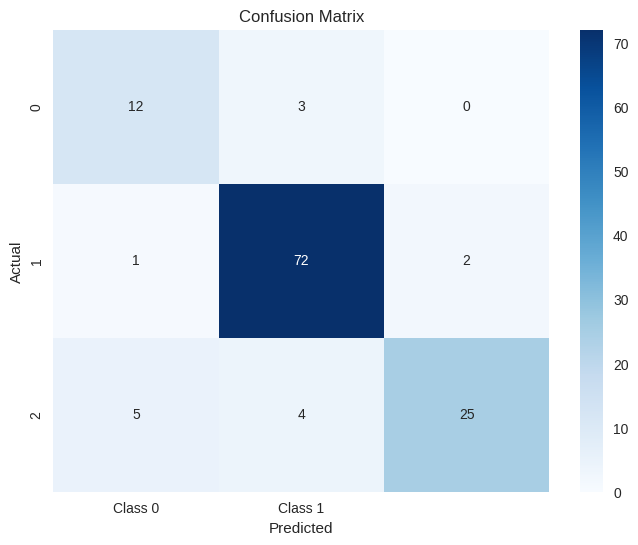

In [363]:
# @title 5.1 Analyze the wrong predictions

cm = confusion_matrix(y_test, svc_y_pred)

misclassified_indices = np.where(y_test != svc_y_pred)[0]

for idx in misclassified_indices:
    print(f"Actual label: {y_test.iloc[idx]}, Predicted label: {svc_y_pred[idx]}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [364]:
# @title 5.2 Improve accuracy SVC model by Feature Scaling

print(f'Before SVC Accuracy: {SVC_accuracy:.3f}')

# Feature Scaling:

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svc_scaled = SVC().fit(x_train_scaled, y_train)
svc_scaled_y_pred=svc_scaled.predict(x_test_scaled)
SVC_scaled_accuracy = accuracy_score(y_test, svc_scaled_y_pred)

print(f'After SVC Accuracy: {SVC_scaled_accuracy:.3f}')

# Conclusion: It improves

Before SVC Accuracy: 0.879
After SVC Accuracy: 0.903
